## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Here we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2020-03-30 14:36:06--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.05s   

2020-03-30 14:36:06 (1.09 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)
# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,160,82,38,53,125,59,5,133,51,18,128,152,259,146,87,0,0,177,183
1,439,98,47,109,202,59,11,199,34,23,154,207,586,165,61,1,33,194,208
2,784,87,37,52,116,54,6,115,58,17,126,135,196,144,74,11,22,186,190
3,389,100,57,107,207,63,11,227,30,25,180,234,756,205,72,6,19,186,198
4,629,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204
5,479,86,42,64,122,54,6,148,46,19,143,170,319,171,87,1,3,179,182
6,639,108,55,105,230,68,11,218,30,24,171,228,709,210,69,14,4,190,197
7,22,94,43,64,173,69,7,150,43,19,142,169,344,177,68,9,1,199,206
8,500,101,56,100,204,62,12,227,30,25,178,231,757,204,73,0,11,186,197
9,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207


In [ ]:
# remove the first column since it contains just the indices of the objects
X_train_pd = X_train_pd.drop([0], axis=1)

# the same goes for X_test
X_test = np.delete(X_test, 0, 1)

Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000
mean,93.291439,44.653916,81.706740,167.708561,61.622951,8.597450,167.808743,41.202186,20.508197,147.683060,187.903461,434.513661,173.752277,72.632058,6.347905,12.748634,188.80510,195.564663
std,8.213325,6.198399,15.635199,33.552589,8.197266,4.779067,33.235966,7.790196,2.600959,14.569795,31.837116,177.002150,32.734787,7.748755,4.830059,9.156517,6.26107,7.487819
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.00000,181.000000
25%,87.000000,39.000000,70.000000,140.000000,57.000000,6.000000,147.000000,34.000000,19.000000,136.000000,167.000000,319.000000,147.000000,68.000000,2.000000,6.000000,184.00000,190.000000
50%,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,361.000000,173.000000,72.000000,5.000000,11.000000,189.00000,197.000000
75%,99.000000,49.000000,98.000000,193.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,578.000000,198.000000,76.000000,9.000000,19.000000,193.00000,201.000000
max,116.000000,59.000000,110.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,40.000000,206.00000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(18)
memory usage: 77.3 KB


#### 2.0. Data preprocessing
* Make some transformations of the dataset

In [ ]:
# check if there are any missing values
X_train_pd.isnull().values.any()

False

In [ ]:
# take a look at the correlation matrix
X_train_pd.corr().round(3).style.background_gradient(cmap='coolwarm')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1,0.683,0.798,0.684,0.093,0.154,0.816,-0.79,0.818,0.665,0.769,0.822,0.581,-0.225,0.213,0.156,0.285,0.35
2,0.683,1,0.801,0.601,0.135,0.24,0.857,-0.821,0.854,0.965,0.803,0.849,0.938,0.092,0.161,-0.02,-0.14,0.008
3,0.798,0.801,1,0.756,0.153,0.265,0.906,-0.912,0.893,0.78,0.861,0.888,0.706,-0.193,0.116,0.265,0.141,0.323
4,0.684,0.601,0.756,1,0.678,0.465,0.723,-0.775,0.695,0.554,0.795,0.709,0.519,-0.119,0.057,0.194,0.357,0.442
5,0.093,0.135,0.153,0.678,1,0.667,0.096,-0.172,0.069,0.123,0.286,0.08,0.108,0.215,-0.039,-0.01,0.199,0.232
6,0.154,0.24,0.265,0.465,0.667,1,0.154,-0.171,0.148,0.311,0.322,0.13,0.179,0.333,0.031,0.054,-0.038,0.127
7,0.816,0.857,0.906,0.723,0.096,0.154,1,-0.972,0.992,0.807,0.945,0.996,0.8,-0.003,0.089,0.213,-0.005,0.105
8,-0.79,-0.821,-0.912,-0.775,-0.172,-0.171,-0.972,1,-0.948,-0.771,-0.932,-0.954,-0.76,0.079,-0.061,-0.191,-0.105,-0.208
9,0.818,0.854,0.893,0.695,0.069,0.148,0.992,-0.948,1,0.808,0.931,0.992,0.797,0.007,0.104,0.218,-0.031,0.081
10,0.665,0.965,0.78,0.554,0.123,0.311,0.807,-0.771,0.808,1,0.745,0.794,0.866,0.075,0.137,-0.002,-0.134,0.048


It shows that several features in our dataset are highly correlated (for example 7 and 9, 7 and 12, etc).

Detect ouliers using boxplot

In [ ]:
figsize_x = 18
figsize_y = 12
f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
sns.boxplot(data=dataset, orient="h", palette="Set2", ax=ax)

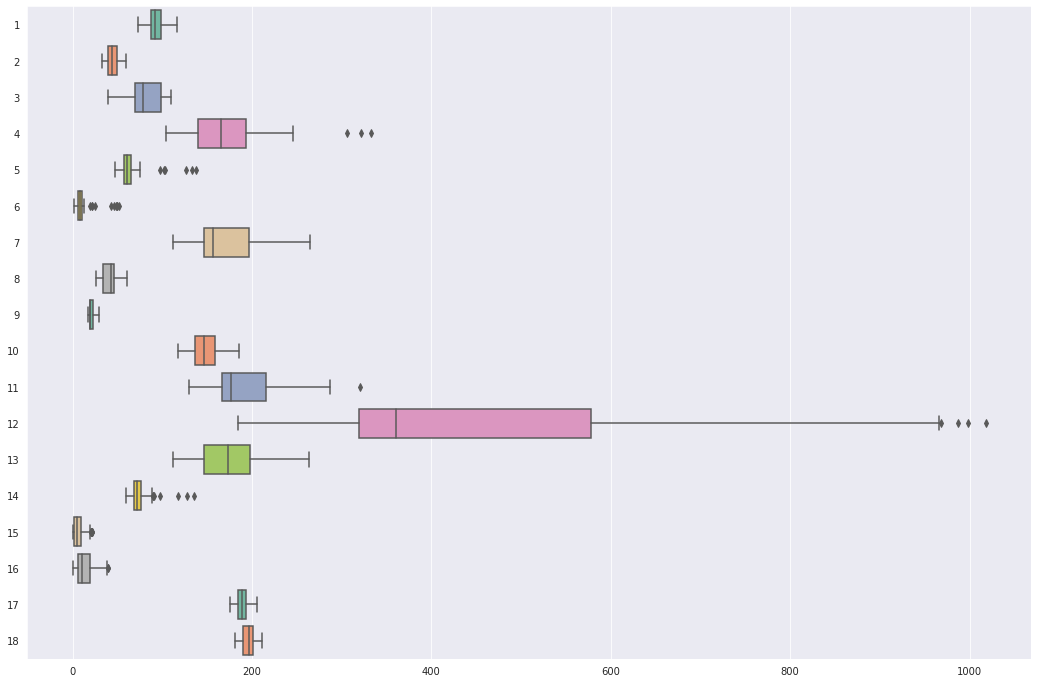

In [ ]:
figsize_x = 18
figsize_y = 12
f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
sns.boxplot(data=X_train_pd, orient="h", palette="Set2", ax=ax)

We could see that there are plenty of outlies. Let's remove them.

But firstly rename columns according to their actual names from original dataset. Correctly named features would be much easier to handle than features with names like '0','1','2', etc.

Concatenate X and y in order to remove both feature data and labels of outliers.

In [ ]:
y_train_pd = pd.DataFrame(y_train)

In [ ]:
X_train_pd.columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance1', 'scaled_variance2', 'scaled_radius_of_gyration', 'skewness_about1', 'skewness_about2', 'kurtosis_about1', 'kurtosis_about2', 'hollows_ratio']
y_train_pd.columns = ['class']

In [ ]:
data_pd = pd.concat([X_train_pd, y_train_pd], axis=1)

Consider that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier and can be removed, where IQR = Q3 - Q1

In [ ]:
Q1 = X_train_pd.quantile(0.25)
Q3 = X_train_pd.quantile(0.75)
IQR = Q3 - Q1

data_pd = data_pd[~((data_pd.iloc[:,:-1] < (Q1 - 1.5 * IQR)) |(data_pd.iloc[:,:-1] > (Q3 + 1.5 * IQR))).any(axis=1)] # overwrite our data_pd removing outliers

In [ ]:
xtrain_scaled = 

In [ ]:
data_pd = data_pd.reset_index(drop=True) # reset indices

In [ ]:
data_pd.shape

(525, 19)

Split them into X and y again.

In [ ]:
X_train_pd = data_pd.iloc[:,:-1]
y_train_pd = data_pd.iloc[:,-1]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case we will use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

We are going to use following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
! pip install scikit-plot

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [ ]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]


hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [ ]:
best_lr_model = clf.fit(X_train_pd, y_train_pd)

In [ ]:
print('Best Penalty:', best_lr_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_lr_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [ ]:
y_pred_test = best_lr_model.predict(X_test)
f1_score(y_test, y_pred_test, average='weighted')

0.7175694313540888

In [ ]:
accuracy_score(y_test, y_pred_test)

0.7272727272727273

In [ ]:
y_proba_test = best_lr_model.predict_proba(X_test)

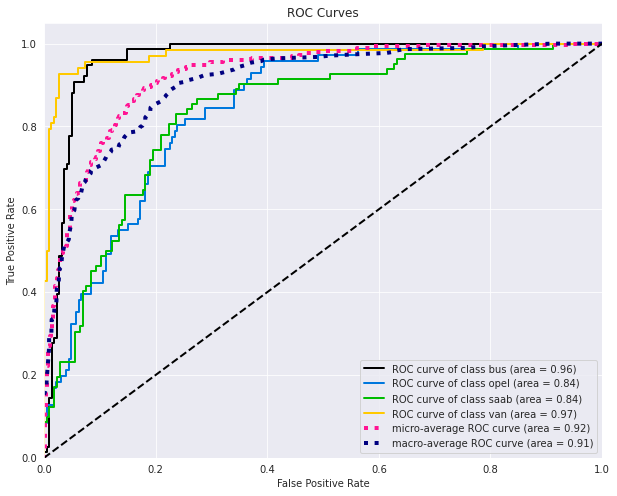

In [ ]:
import scikitplot
scikitplot.metrics.plot_roc(y_test, y_proba_test, figsize=(10,8))

**Logistic Regression Summary:**


*   Best Penalty: l2, Best C: 0.1
*   f1_score: 0.718
*   Accuracy: 0.727

f1 and accuracy scores depend on random seed of train_test_split. So, the above values are averaged across several launches of the code.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

We need to normalize our data before applying PCA.

In [ ]:
# normalization using StandardScaler

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_pd), columns = X_train_pd.columns)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Explained Variance Plot')

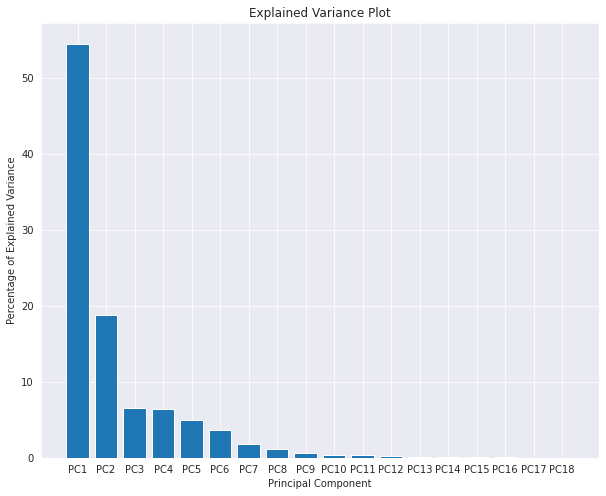

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance Plot')

#### 2.3. PCA trasformation
* Select the appropriate number of components.

In [ ]:
pca = PCA(n_components=0.99) # retain 99% of the variance
X_pca = pca.fit_transform(X_train_scaled)
X_pca_pd = pd.DataFrame(data=X_pca)
print('We have', X_pca.shape[1], 'features left out of 18 after applying PCA')

We have 11 features left out of 18 after applying PCA


#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model.

In [ ]:
best_pca_model = clf.fit(X_pca_pd, y_train_pd)

In [ ]:
# apply PCA on test data
X_test_pd = pd.DataFrame(X_test)
X_test_scaled = pd.DataFrame(sc.transform(X_test_pd), columns = X_test_pd.columns)

In [ ]:
X_pca_test = pca.transform(X_test_scaled)
X_pca_test_pd = pd.DataFrame(data=X_pca_test)

In [ ]:
y_pred_test_pca = best_pca_model.predict(X_pca_test_pd)
print('f1_score:', f1_score(y_test, y_pred_test_pca, average='weighted'))

f1_score: 0.7335275960250961


In [ ]:
print('accuracy:', accuracy_score(y_test, y_pred_test_pca))

accuracy: 0.734006734006734


In [ ]:
y_proba_pca = best_pca_model.predict_proba(X_pca_test_pd)

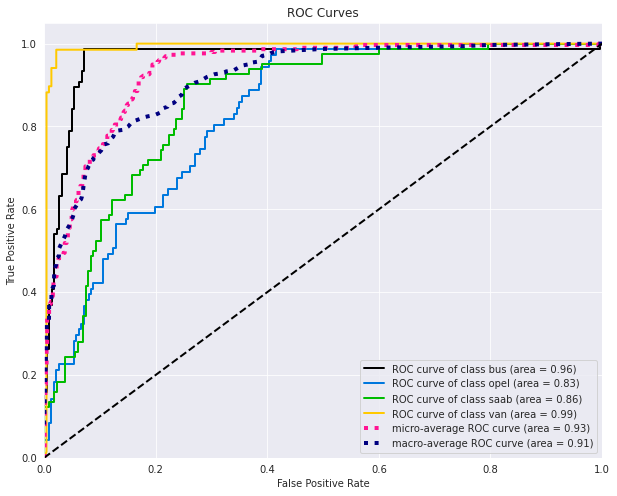

In [ ]:
scikitplot.metrics.plot_roc(y_test, y_proba_pca, figsize=(10,8))

**Logistic regression on PCA-preprocessed data summary**

*   f1_score: 0.7335
*   accuracy: 0.734

We have slightly better results when using Logistic Regression with PCA.


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
max_depth = range(3,300)
hyperparameters = dict(max_depth=max_depth)
clf = GridSearchCV(decision_tree, hyperparameters, cv=5, verbose=0)
# train on PCA data
best_tree_model = clf.fit(X_pca_pd, y_train_pd)

In [ ]:
print('Best max_depth:', best_tree_model.best_estimator_.get_params()['max_depth'])

Best max_depth: 290


In [ ]:
y_pred_test_tree = best_tree_model.predict(X_pca_test_pd)
print('f1_score:', f1_score(y_test, y_pred_test_tree, average='weighted'))

f1_score: 0.6049137853897905


In [ ]:
print('accuracy:', accuracy_score(y_test, y_pred_test_tree))

accuracy: 0.5959595959595959


In [ ]:
# train on data without PCA
best_tree_model = clf.fit(X_train_pd, y_train_pd)
y_pred_test_tree = best_tree_model.predict(X_test)
print('Best max_depth:', best_tree_model.best_estimator_.get_params()['max_depth'])

Best max_depth: 6


In [ ]:
print('f1_score:', f1_score(y_test, y_pred_test_tree, average='weighted'))

f1_score: 0.6975566064466697


In [ ]:
print('accuracy:', accuracy_score(y_test, y_pred_test_tree))

accuracy: 0.7003367003367004


In [ ]:
y_proba_tree = best_tree_model.predict_proba(X_test)

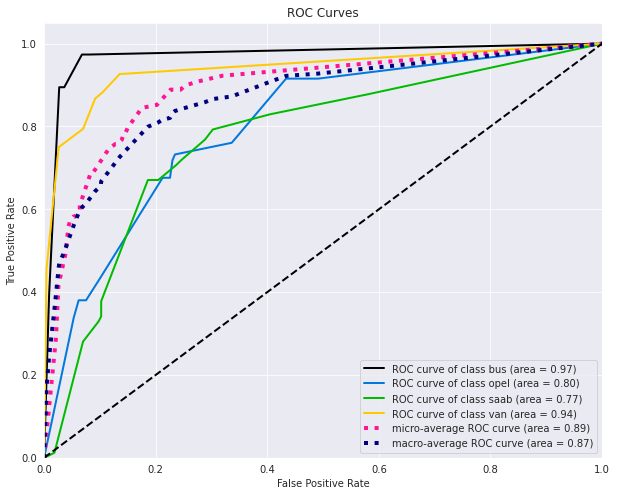

In [ ]:
scikitplot.metrics.plot_roc(y_test, y_proba_tree, figsize=(10,8))

Model quality decreased compared to the previous models. Especially, if we build our model on PCA data.

If we use non-PCA data, the scores are the following:

*   f1_score: 0.698
*   accuracy: 0.700

